In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
print(f"Using CAMB {camb.__version__} installed at {camb.__file__}")

Using CAMB 1.5.4 installed at /home/joao/.local/lib/python3.10/site-packages/camb/__init__.py


In [2]:
h = 0.6756
omegam = 0.27
omegabh2 = 0.02238280
omegab = omegabh2/h**2
omegac = omegam - omegab
omegach2 = omegac*h**2

cases = [
	{'A': 0, 'nu': 10},
    {'A': 0.1, 'nu': 50},
    {'A': 0.05, 'nu': 200},
    {'A': 0.05, 'nu': 50},
]
results = []

for case in cases:
	cosmo = camb.set_params(# Background
		H0=100*h, ombh2=omegabh2, omch2=omegach2, TCMB=2.7255,
		# Dark Energy
		dark_energy_model = 'MonodromicQuintessence', alpha=0.2, A=case['A'], nu=case['nu'],
		# Neutrinos
		omnuh2=0, num_nu_massless=3.044, num_nu_massive = 0,
		nu_mass_degeneracies=[0], nu_mass_numbers = [0],
		# Initial Power Spectrum
		As = 2.100549e-09, ns = 0.9660499, 
		YHe = 0.246, WantTransfer=True
	)
	results.append(camb.get_results(cosmo))

 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =   0.45623648703676789     
 C =    1.4456755077028907E-007 => omega_de =    1.1186705498277241     
 C =    9.2356934794246909E-008 => omega_de =   0.73348063795318652      (error =    4.8941399687168321E-003 )
 C =    9.1883361387573877E-008 => omega_de =   0.72994861109085718      (error =    5.5139574553219192E-005 )
 Finished shooting successfully after            2 iterations
 Shooting for C with tentative values:    5.5602904142418870E-008   1.4456755077028907E-007
 Target Omega_de:  0.72990836425418937     
 C =    5.5602904142418870E-008 => omega_de =   0.62466050422718289     
 C =    1.4456755077028907E-007 => omega_de =    1.6239844065235631     
 C =    6.4972577632791550E-008 => omega_de =   0.72990682955684416      (error =   -2.1025890651013022E-006 )
 Finished shooting successfully after    

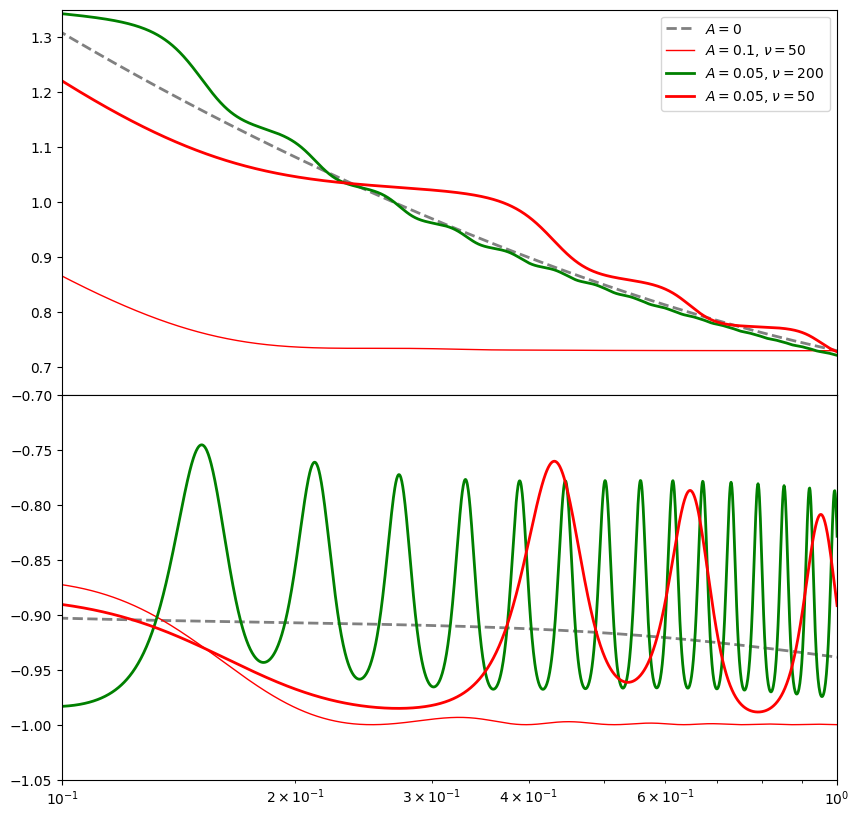

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,10), gridspec_kw={'hspace': 0})
scale_factor = np.logspace(-6, 0, 10000)
redshift = 1/scale_factor - 1
lws = [2, 1, 2, 2]
lss = ['--', '-', '-', '-']
colors = ['gray', 'red', 'green', 'red']
legend_labels = [r"$A = 0$", r"$A = 0.1$, $\nu = 50$", r"$A = 0.05$, $\nu = 200$", r"$A = 0.05$, $\nu = 50$"]
for case, result, ls, lw, color, label in zip(cases, results, lss, lws, colors, legend_labels):
    rho_de = result.get_background_densities(scale_factor)['de']/scale_factor**4
    _, w_de = result.get_dark_energy_rho_w(scale_factor)
    hubble = result.hubble_parameter(redshift)
    cls = result.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
    ks = result.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
    pk = result.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]
    axs[0].semilogx(scale_factor, rho_de/result.grhocrit, ls=ls, lw=lw, label=label, color=color)
    axs[1].semilogx(scale_factor, w_de, ls=ls, lw=lw, label=label, color=color)
plt.xlim([0.1, 1])
axs[0].set_ylim([0.65, 1.35])
axs[1].set_ylim([-1.05, -0.7])
axs[0].legend(loc='upper right')